The sentiment of reviews is binary, meaning the review rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. 

In [61]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('reviews.csv')
dataset.drop(columns="Id", inplace=True)
dataset

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4
...,...,...
107013,Trendy topic with talks from expertises in the...,4
107014,"Wonderful! Simple and clear language, good ins...",5
107015,an interesting and fun course. thanks. dr quincy,5
107016,"very broad perspective, up to date information...",4


In [62]:
dataset = dataset.drop_duplicates(ignore_index=True)
dataset

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4
...,...,...
100467,Trendy topic with talks from expertises in the...,4
100468,"Wonderful! Simple and clear language, good ins...",5
100469,an interesting and fun course. thanks. dr quincy,5
100470,"very broad perspective, up to date information...",4


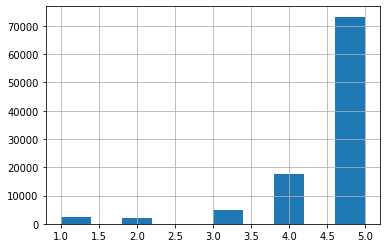

In [63]:
dataset['Label'].hist()

In [64]:
dataset['Label'].value_counts()

5    73276
4    17558
3     5016
1     2403
2     2219
Name: Label, dtype: int64

In [65]:
# 어중간한 3점 삭제해 버리기
rating_3 = dataset[dataset['Label']==3].index
del_3 = dataset.drop(rating_3)
dataset=del_3

In [66]:
dataset['Label'].value_counts()

5    73276
4    17558
1     2403
2     2219
Name: Label, dtype: int64

In [67]:
# 현재 4~5점(긍정)에 데이터가 너무 많음
#1~2점(부정)과 4~5점(긍정) 데이터 비율을 맞춰주기
def reduce_size(x):
    if len(x.index) > 70000:
        return x.sample(n=int(len(x.index)/35)) #70000/2200
    elif len(x.index) > 17000:
        return x.sample(n=int(len(x.index)/7)) #17000/2200
    else:
        return x

dataset = dataset.groupby('Label').apply(reduce_size).reset_index(drop=True)
dataset['Label'].value_counts()

# 4~5점 = 4601 / 1~2점 = 4622

4    2508
1    2403
2    2219
5    2093
Name: Label, dtype: int64

In [68]:
dataset.shape

(9223, 2)

In [69]:
dataset

,Review,Label
0,This course doesn't contain any new informatio...,1
1,I do not find very interesting this course. to...,1
2,A lot of speaking without any sense. Skip it a...,1
3,It's not a course... this is a very short gene...,1
4,"First of all, I really enjoyed Professor Ittne...",1
...,...,...
9218,A good start for studying machine learning. Mu...,5
9219,The course cleared a lot of doubts i was havin...,5
9220,It is very nice and great course,5
9221,David is the best programing teacher what I ha...,5


In [70]:
# Ready to split 'train set' and  'test set'
X = dataset['Review']
y = dataset['Label']

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,  y,  test_size=0.5,shuffle=True,  random_state=1004)
             
print('X_train shape:', X_train.shape)

print('X_test shape:', X_test.shape)

print('y_train shape:', y_train.shape)

print('y_test shape:', y_test.shape)

X_train shape: (4611,)
X_test shape: (4612,)
y_train shape: (4611,)
y_test shape: (4612,)


In [72]:
print(type(y_train))
print(type(X_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [73]:
# train과 test의 데이터에 각 점수들이 반반씩 잘 분포 되었음.
print('train set:', y_train.value_counts())
print('----------------------------')
print('test set:', y_test.value_counts())

train set: 4    1220
1    1211
2    1102
5    1078
Name: Label, dtype: int64
----------------------------
test set: 4    1288
1    1192
2    1117
5    1015
Name: Label, dtype: int64


In [74]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9218    5
9219    5
9220    5
9221    5
9222    5
Name: Label, Length: 9223, dtype: int64

In [75]:
dataset.dtypes

Review    object
Label      int64
dtype: object

In [76]:
#replace has a default arg inplace=False. 
#Thus, your results will not affect each other and you will have to combine them into dataset['label']=dataset['label'].replace([1,2,4,5],[0,0,1,1]) or 
#dataset['label'].replace([1,2,4,5],[0,0,1,1],inplace=True)

dataset['Label']=dataset['Label'].replace([1,2,4,5],[0,0,1,1])

In [77]:
dataset['Label'].value_counts()

0    4622
1    4601
Name: Label, dtype: int64

In [78]:
X_train

1519    The Lecturers are very enthusiastic, but I was...
2501    Beware this course, especially if you are new ...
8896    Excellent way to learn basics of Python. Exerc...
6753    Very approachable material, given the diversit...
7326                Great Course with Mighty professor :)
                              ...                        
2740    The value of this course is the collection of ...
9055    excellent course. very experienced and knowled...
8206    Exceptional curriculum layout with thoughtful ...
8391    A wonderful introduction to machine learning. ...
4127    By the end of the course, you do start to deve...
Name: Review, Length: 4611, dtype: object

In [79]:
X_test

5942    Great class. I like the pace and I am learning...
1456    Very bad course too fast is not an introductio...
7128    This was much more in-depth than the intro cou...
5831       Very energetic lecturer :) Thoroughly enjoyed.
7466                   An excellent introduction into SQL
                              ...                        
5638    Its interesting and enables me to gain more in...
3380    This instructor reads of a script! He rushes t...
3200    Basically not much content. The guest speaker ...
2075    Beware - will make you upgrade to complete qui...
3624    I do like the course, but Coursera has disable...
Name: Review, Length: 4612, dtype: object

In [80]:
# concat()dms df와 series에 다 적용가능
train_set = pd.concat([X_train, y_train], axis = 1)
print(train_set)

                                                 Review  Label
1519  The Lecturers are very enthusiastic, but I was...      1
2501  Beware this course, especially if you are new ...      2
8896  Excellent way to learn basics of Python. Exerc...      5
6753  Very approachable material, given the diversit...      4
7326              Great Course with Mighty professor :)      5
...                                                 ...    ...
2740  The value of this course is the collection of ...      2
9055  excellent course. very experienced and knowled...      5
8206  Exceptional curriculum layout with thoughtful ...      5
8391  A wonderful introduction to machine learning. ...      5
4127  By the end of the course, you do start to deve...      2

[4611 rows x 2 columns]


In [81]:
train_set.head(8)

,Review,Label
1519,"The Lecturers are very enthusiastic, but I was...",1
2501,"Beware this course, especially if you are new ...",2
8896,Excellent way to learn basics of Python. Exerc...,5
6753,"Very approachable material, given the diversit...",4
7326,Great Course with Mighty professor :),5
4991,I learned a lot from this course. It did feel ...,4
495,I think there are only few contents.,1
1724,"Excellent teaching, but it's not actually free...",1


In [82]:
train_set['Review'][7]

'The Capstone project has been getting delayed since JanDont expect yourself to complete the specialization'

In [83]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(train_set['Review'][7], "html5lib")
print(train_set['Review'][:20])


example1.get_text()[:10]

1519    The Lecturers are very enthusiastic, but I was...
2501    Beware this course, especially if you are new ...
8896    Excellent way to learn basics of Python. Exerc...
6753    Very approachable material, given the diversit...
7326                Great Course with Mighty professor :)
4991    I learned a lot from this course. It did feel ...
495                  I think there are only few contents.
1724    Excellent teaching, but it's not actually free...
4835    Very good, learnt a lot. Would be even better ...
2986    Too basic. Should give an example on how these...
6853    Very informative and enlightening. Learnt quit...
1909    Instructor doesn't seem to be passionate about...
1625    Pretty bad as far as I am conerned. I spent tw...
8229    Thank you so much for the course!I liked the r...
4745    I really enjoyed this course overall (and it w...
531     I'm sorely disappointed. I learned almost noth...
1493    Poor quality and heavily outdated content. Vid...
5724          

'The Capsto'

In [84]:
import re
letters_only= re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:10]

'The Capsto'

In [85]:
# making lower case
lower_case = letters_only.lower()
# lower_case = letters_only['Review'].str.lower()      # Q str?

In [86]:
# Tokenizing
words = lower_case.split()
print(len(words))
words[:10]

15


['the',
 'capstone',
 'project',
 'has',
 'been',
 'getting',
 'delayed',
 'since',
 'jandont',
 'expect']

In [113]:
# DOwnload for preprocessing the text
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [114]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

Stopwords

In [115]:
# Tokens exceot for stopwords 
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

9


['capstone',
 'project',
 'getting',
 'delayed',
 'since',
 'jandont',
 'expect',
 'complete',
 'specialization']

## SnowballStemmer

print("The stemmed form of studying is: {}".format(stemmer.stem("studying")))  
print("The stemmed form of studies is: {}".format(stemmer.stem("studies")))  
print("The stemmed form of study is: {}".format(stemmer.stem("study")))  

>The stemmed form of studying is: studi  
>The stemmed form of studies is: studi  
>The stemmed form of study is: studi  

In [106]:
# Before stemmer
words[:30]

['capstone',
 'project',
 'getting',
 'delayed',
 'since',
 'jandont',
 'expect',
 'complete',
 'specialization']

In [107]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

wordss = [stemmer.stem(w) for w in words]
# After stemmer
words[:10]

['capstone',
 'project',
 'getting',
 'delayed',
 'since',
 'jandont',
 'expect',
 'complete',
 'specialization']

In [108]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

words = [wordnet_lemmatizer.lemmatize(w) for w in words]
# 처리 후 단어
words[:10]

['capstone',
 'project',
 'getting',
 'delayed',
 'since',
 'jandont',
 'expect',
 'complete',
 'specialization']

In [109]:
def review_to_words(raw_review ):
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. 소문자 변환
    words = letters_only.lower().split()
    # 4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords.words('english'))
    # 5. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return( ' '.join(stemming_words) )

In [110]:
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [111]:
%time clean_train_reviews = apply_by_multiprocessing(\
    train_set['Review'], review_to_words, workers=4)  

CPU times: user 55.7 ms, sys: 83.2 ms, total: 139 ms
Wall time: 3.15 s


In [149]:
clean_train_reviews

1519    lectur enthusiast hope exampl assign base pand...
2501    bewar cours especi new area despit cours speci...
8896    excel way learn basic python exercis easi enou...
6753       approach materi given divers classif algorithm
7326                         great cours mighti professor
                              ...                        
2740    valu cours collect read materi found place lec...
9055    excel cours experienc knowledg professor conte...
8206       except curriculum layout thought lectur assign
8391    wonder introduct machin learn access enough ne...
4127    end cours start develop hacker mental cours wr...
Name: Review, Length: 4611, dtype: object

In [116]:
%time clean_test_reviews = apply_by_multiprocessing(\
   X_test, review_to_words, workers=4)  

CPU times: user 72.2 ms, sys: 95.8 ms, total: 168 ms
Wall time: 3.47 s


## Bag-of-words model - Wikipedia  
다음의 두 문장이 있다고 하자,  

(1) John likes to watch movies. Mary likes movies too.  
(2) John also likes to watch football games.  
위 두 문장을 토큰화 하여 가방에 담아주면 다음과 같다.  

[
    "John",  
    "likes",  
    "to",  
    "watch",  
    "movies",  
    "Mary",    
    "too",  
    "also",  
    "football",  
    "games"  
]  
그리고 배열의 순서대로 가방에서 각 토큰이 몇 번 등장하는지 횟수를 세어준다.  
  
(1) [1, 2, 1, 1, 2, 1, 1, 0, 0, 0]    
(2) [1, 1, 1, 1, 0, 0, 0, 1, 1, 1]    
=> 머신러닝 알고리즘이 이해할 수 있는 형태로 바꿔주는 작업이다.  
  
단어 가방을 n-gram을 사용해 bigram 으로 담아주면 다음과 같다.  

[  
    "John likes",  
    "likes to",  
    "to watch",  
    "watch movies",  
    "Mary likes",  
    "likes movies",  
    "movies too",  
]  
=> 여기에서는 CountVectorizer를 통해 위 작업을 한다.  

## 사이킷런의 단어 카운트 (CountVectorizer)를 통해 피처 생성  
정규표현식을 사용해 토큰을 추출한다.  
모두 소문자로 변환시키기 때문에 good, Good, gOod이 모두 같은 특성이 된다.  
의미없는 특성을 많이 생성하기 때문에 적어도 두 개의 문서에 나타난 토큰만을   사용한다.  
min_df로 토큰이 나타날 최소 문서 개수를 지정할 수 있다.  



### <CountVectorizer 파라미터>
출처: https://chan-lab.tistory.com/27 [은공지능 공작소]
1.  analyzer 파라미터는 학습단위를 결정하는 파라미터입니다.
- word, char 2가지 옵션 정도를 고려해볼 수 있습니다.
- analyzer = 'word'라고 설정시, 학습의 단위를 단어로 설정합니다. (ex - home, go, my ...)
- analyzer = 'char'라고 설정시, 학습의 단위를 글자로 설정합니다.(ex - a, b, c, d ...)
- char 기반의 analyzer을 하면, ('a', 1), ('b', 2), ('c', 3), ('e', 4), ('g', 5), ('h', 6), ('i', 7)... 형태로 출력되기 때문에 실제 모델에서
좋은 성능을 보일지 의문이 남을 수도 있을 것 같습니다.  
결론부터 말씀드리면, 상당히 좋은 결과를 내놓을 수 있습니다.  
제가 CNN 모델에서 char analyzer로 학습을 시킨 적이 있었는데,
생각보다 괜찮은 결과가 나왔던 것으로 기억합니다.  
그러니 모델의 성능을 올리기 위해서, word 기반 방법만 고집할 것이 아니라 char 기반의 방법도 시도해 볼 만하다고 생각합니다.  
2.  
3.  
4.  
5.min_df 파라미터 
- 최소 빈도값을 설정해주는 파라미터
최소 DF가 2로 설정되었으니, 1인 것들은 모두 탈락하게 됩니다.


6. ngram_range 파라미터   
- 만약 ngram_range = (1, 3)라고 한다면, 단어의 묶음을 1개부터 3개까지 설정하라는 뜻입니다.
- 단어사전에는 1개 단어묶음도 있고, 2개 단어묶음도, 3개 단어묶음도 존재하게 되겠죠.


In [117]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, # 토큰이 나타날 최소 문서 개수
                             ngram_range=(1, 3),
                             max_features = 20000
                            )
vectorizer

CountVectorizer(max_features=20000, min_df=2, ngram_range=(1, 3))

## pipeline

https://deepinsight.tistory.com/173

cross-validation 과 GridSearch 과정을 하나로 만들어 주는게 pipeline의 가장 큰 장점이라고 합니다. 제 코드에는 cross-validation 과 GridSearch 과정이 없는데 해당 과정은 모델의 성능(정확도)를 측정해 보는 과정이고, GridSearch는 최적의 하이퍼파라메터를 찾는 과정입니다.
Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.

더 읽어보기 : https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [98]:
# 여기에서는 하나의 과정만 묶어주어 pipeline이 불필요 할 수도 있습니다.
# pipeline은 feature engineering의 여러 과정을 묶어 줄 때 사용합니다.
pipeline = Pipeline([
    ('vect', vectorizer),
])  

In [118]:
'''
CountVectorizer는 여러 메소드 목록을 제공하고 있습니다.
메소드 중에서 fit_transform 을 하면  term-document matrix 를 반환하는 것을 볼 수 있습니다.
파이프라인으로 fit_transform을 해주게 되는데 해당 과정의 결과로 피처의 목록과 등장여부를 알 수 있습니다.
'''

# Q) pipeline이 CountVectorizer를 가지고 오는 건가? 그 다음 fit_transform을 써서 clean_train_reviews를 verctorizing 하는 건가? 
%time train_data_features = pipeline.fit_transform(clean_train_reviews)
train_data_features

CPU times: user 1.03 s, sys: 47.2 ms, total: 1.07 s
Wall time: 1.08 s


<4611x14081 sparse matrix of type '<class 'numpy.int64'>'
	with 116600 stored elements in Compressed Sparse Row format>

보통 fit을 학습하는데 사용하는데 여기에서는 벡터화 할 때도 fit을 사용했습니다. 사이킷런에 구현된 벡터화 알고리즘이 fit을 사용해서 벡터화 하도록 되어 있습니다. 따라서 RF에서의 fit과 벡터화에 사용되는 fit은 다른 성격입니다.

In [100]:
# vectorize를 한 결과 
train_data_features.shape

(4611, 14081)

In [101]:
'''
get_feature_names() 라는 것도 CountVectorizer 에서 사용할 수 있는 메소드 중 하나입니다.
위에서 정의한 CountVectorizer 에 데이터를 넣어주고 fit 혹은 fit_transform 을 하게 되면 벡터화와 함께 사전(get_feature_names)을 생성하게 됩니다.
'''
# 위위 줄에서 pipeline으로 fit.trainsform 했으니까, get_feature_names() 가 clean_train_reviews 라는 거를 아는 건가?
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

14081


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abil',
 'abil appli',
 'abl',
 'abl appli',
 'abl complet',
 'abl complet assign',
 'abl complet cours',
 'abl exercis',
 'abl find']

In [102]:
# 벡터화 된 피처를 확인해 봄
import numpy as np
dist = np.sum(train_data_features, axis=0)
    
for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

[[ 8 20  2 ...  3  3  2]] abandon


,abandon,abil,abil appli,abl,abl appli,abl complet,abl complet assign,abl complet cours,abl exercis,abl find,...,zero experi,zero interact,zero knowledg,zero littl,zero star,zionism,zip,zip file,zizozi,zone
0,8,20,2,101,4,6,2,3,2,3,...,3,2,2,2,3,2,4,3,3,2


In [103]:
pd.DataFrame(train_data_features[:10].toarray(), columns=vocab).head()

,abandon,abil,abil appli,abl,abl appli,abl complet,abl complet assign,abl complet cours,abl exercis,abl find,...,zero experi,zero interact,zero knowledg,zero littl,zero star,zionism,zip,zip file,zizozi,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 랜덤 포레스트 - 위키백과, 우리 모두의 백과사전
랜덤 포레스트의 가장 핵심적인 특징은 임의성(randomness)에 의해 서로 조금씩 다른 특성을 갖는 트리들로 구성된다는 점이다.  
이 특징은 각 트리들의 예측(prediction)들이 비상관화(decorrelation) 되게하며, 결과적으로 일반화(generalization) 성능을 향상시킨다.  
또한, 임의화(randomization)는 포레스트가 노이즈가 포함된 데이터에 대해서도 강하게 만들어 준다.


- 랜덤 포레스트는 n_jobs를 이용하여 여러개의 코어를 이용하여 병렬 처리를 통해 속도 향상을 시킬 수 있다.

print("학습용 세트 정확도 : {:.3f}".format(model.score(X_train, y_train))) 
print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test))) 

In [104]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
# 100개의 트리
model = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state=2018)
model

RandomForestClassifier(n_jobs=-1, random_state=2018)

In [134]:
 # model.fit(X_train, y_train)  #모델 학습
# 위에서 X = dataset['Review'], y = dataset['Label'] 으로 해주고 x_train, y_train_split() 했으니까, y_train으로(dataset['Label']이 아니고)

%time model = model.fit(train_data_features, y_train)

# pred = model.predict(X_test)

CPU times: user 13.3 s, sys: 38.1 ms, total: 13.3 s
Wall time: 6.99 s


In [133]:
# print("학습용 세트 정확도 : {:.3f}".format(model.score(train_data_features, y_train))) 
# train set에 대한 걸로만 vector화를 해주었으므로, test 셋은 valueerror가 나옴.
# print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test))) 

### 평가 - ROC 커브(Receiver-Operating Characteristic curve)
TPR(True Positive Rate)과 FPR(False Positive Rate)을 각각 x, y 축으로 놓은 그래프
민감도 TPR
1인 케이스에 대해 1로 예측한 비율
암환자를 진찰해서 암이라고 진단함
특이도 FPR

0인 케이스에 대해 1로 잘못 예측한 비율
암환자가 아닌데 암이라고 진단함
X, Y가 둘 다 [0, 1] 범위이고 (0, 0)에서 (1, 1)을 잇는 곡선이다.

ROC 커브의 및 면적이 1에 가까울 수록(왼쪽 꼭지점에 다가갈수록) 좋은 성능

In [147]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(model, train_data_features, train_set['Label'], cv=10, scoring='roc_auc'))
score


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most

CPU times: user 6.31 s, sys: 884 ms, total: 7.19 s
Wall time: 1min 26s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,


nan

## 예측

In [157]:
# 체크해 보고 싶은 Review(string)를 Series에 담아준다.
# reveiw_sample1 = "I don't like to spend money to bad lecture, but Cousera MOOC is really helpful to upgrade my understanding of U.S history."

reveiw_sample1 = "I I don't understand "
sample1 = pd.Series(reveiw_sample1)

In [167]:
# 테스트 데이터를 벡터화 함
%time test_data_feature = pipeline.transform(sample1)

test_data_feature = test_data_feature.toarray()

CPU times: user 1.65 ms, sys: 0 ns, total: 1.65 ms
Wall time: 1.67 ms


In [168]:
test_data_feature

array([[0, 0, 0, ..., 0, 0, 0]])

In [160]:
# clean_train_reviews에 대한 vocab 
# 벡터화 하며 만든 사전에서 해당 단어가 무엇인지 찾아볼 수 있다.
# vocab = vectorizer.get_feature_names()
# vocab[8], vocab[2558], vocab[2559], vocab[2560]

In [169]:
# 테스트 데이터를 넣고 예측한다.
result = model.predict(test_data_feature)
# result[:100] # 100개의 리뷰에 대해서 뽑을 때 
# 여기서는 test_data_feature 하나니까 결과값이 1개 나오는 것임 
print("결과:",result)  #긍정1 부정0

결과: [1]


## 모델의 정확도를 높이기 위한 개선 방법
1. Stopwords 라이브러리 추가 
2. Convector 파라미터 바꿔가면서 해보기 